# Adding the measurements to the simple Kalman filter

The measurement model is defined as

$z_t = C x_t + \delta_t$

C = [1 0]

and $\delta_t \sim \mathcal{N}(\begin{bmatrix}0\\0\end{bmatrix},\,\sigma^{2}CC^T)$\,

Therefore,

$Q_t = \sigma^{2}CC^T = 10$

In the previous question, we calculated,

$\overline{\mu}_{t=5} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$

$\overline{\Sigma}_{t=5} = \begin{bmatrix} 41.25 & 12.5 \\ 12.5 & 5 \end{bmatrix}$

$K_{5} = \overline{\Sigma}_5 C^T \big( C \overline{\Sigma}_5 C^T + Q\big)^{-1}$

$K_5 = \begin{bmatrix} 0.8 \\ 0.24 \end{bmatrix}$

$\mu_5 = \overline{\mu}_5 + K_5 \big( z_5 - C_5 \overline{\mu}_5 \big)$

$\mu_5 = \begin{bmatrix} 4 \\ 1.2 \end{bmatrix}$

$\Sigma_5 = \big( \it{I} - K_5 C \big) \overline{\Sigma_5} $

$\Sigma_5 = \begin{bmatrix} 8.05 & 2.44 \\ 2.44 & 1.95 \end{bmatrix}$

Or we can do this with code

In [8]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import math

In [9]:
def Update(meanPredict, covPredict, C, Qt, zt):
    Kp = C.dot(covPredict).dot(C.transpose()) + Qt
    K = covPredict.dot(C.transpose())/Kp
    K.shape = (2, 1) # this and the next two lines are to force col and row vectors
    C.shape = (1, 2)
    meanPredict.shape = (2,1)
    mean = meanPredict + K * (zt - C.dot(meanPredict))
    covp = (np.identity(2) - K.dot(C))
    cov = covp.dot(covPredict)
    return mean, cov

In [10]:
[mean, cov] = Update(np.array([0, 0]), 
                     np.array([[41.25, 12.5], [12.5, 5]]), 
                     np.array([1, 0]), 10, 5)
print("mean = \n", mean)
print("Covariance = \n", cov)

mean = 
 [[4.02439024]
 [1.2195122 ]]
Covariance = 
 [[8.04878049 2.43902439]
 [2.43902439 1.95121951]]


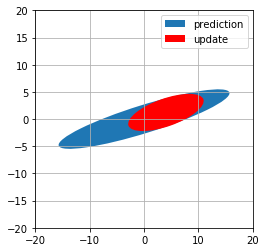

In [14]:
cov_predict = np.array([[41.25,12.5], [12.5,5.]])
[eigValues_predict, eigVectors_predict] = LA.eig(cov_predict)


ellipseWidth = 2 * math.sqrt(eigValues_predict[0] * 5.991)
ellipseHeight = 2 * math.sqrt(eigValues_predict[1] * 5.991)
angle = math.atan(eigVectors_predict[1,0]/eigVectors_predict[0,0])
angleDegree = angle*180/math.pi

fig = plt.figure()
ax = fig.add_subplot(1,1,1, aspect='equal')
e1=Ellipse((0,0), ellipseWidth, ellipseHeight, angleDegree, label="prediction")
ax.add_patch(e1)
ax.set_xlim([-20,20])
ax.set_ylim([-20,20])
plt.grid(True)

[eigValues_update, eigVectors_update] = LA.eig(cov)

ellipseWidth = 2 * math.sqrt(eigValues_update[0] * 5.991)
ellipseHeight = 2 * math.sqrt(eigValues_update[1] * 5.991)
angle = math.atan(eigVectors_update[1,0]/eigVectors_update[0,0])
angleDegree = angle*180/math.pi

e2=Ellipse(mean, ellipseWidth, ellipseHeight, 
           angleDegree, facecolor='red', label="update")
ax.add_patch(e2)
plt.legend()

plt.show()